In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [121]:
#Loading dataset
df = pd.read_csv('BlackFriday.csv')

plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [122]:
df.head

<bound method NDFrame.head of         User_ID Product_ID  ... Product_Category_3 Purchase
0       1000001  P00069042  ...                NaN     8370
1       1000001  P00248942  ...               14.0    15200
2       1000001  P00087842  ...                NaN     1422
3       1000001  P00085442  ...                NaN     1057
4       1000002  P00285442  ...                NaN     7969
...         ...        ...  ...                ...      ...
537572  1004737  P00193542  ...                NaN    11664
537573  1004737  P00111142  ...               16.0    19196
537574  1004737  P00345942  ...                NaN     8043
537575  1004737  P00285842  ...                NaN     7172
537576  1004737  P00118242  ...                NaN     6875

[537577 rows x 12 columns]>

In [123]:
#Dataset
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


Exploratory data analysis

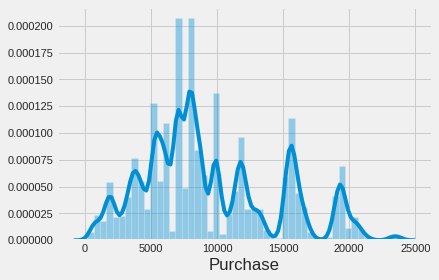

In [124]:
sns.distplot(df['Purchase'])

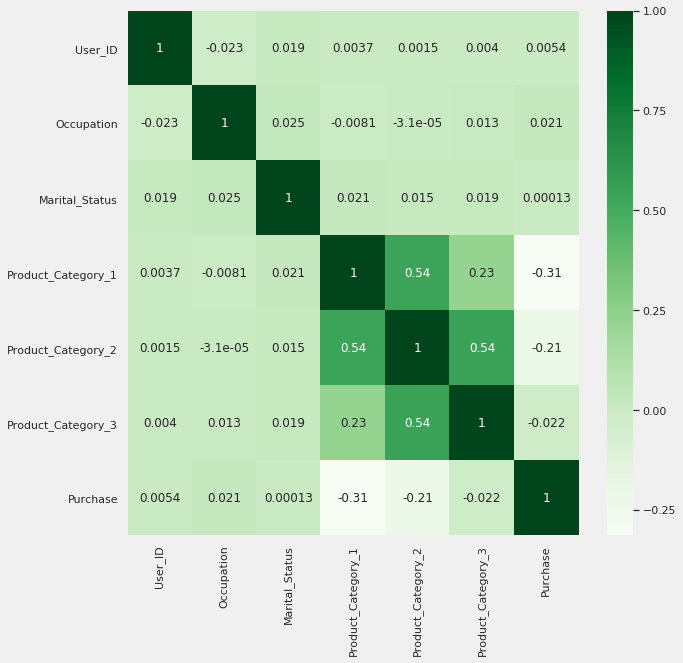

In [125]:
#heatmap representing relation between all features
plt.figure(figsize = (9,9))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, cmap="Greens")

In [126]:
#Unique Customers based on gender that bought a product
gender_df = df.copy()
gender_unique = gender_df.groupby(['User_ID','Gender'])['Gender'].count().groupby(['Gender']).count()
gender_unique

Gender
F    1666
M    4225
Name: Gender, dtype: int64

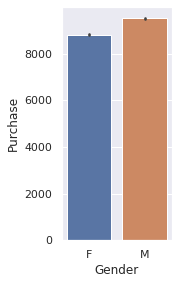

In [127]:
#Barplot of purchased items categorized by gender
plt.subplot2grid((1, 3), (0, 2))
sns.barplot('Gender', 'Purchase', data = df)

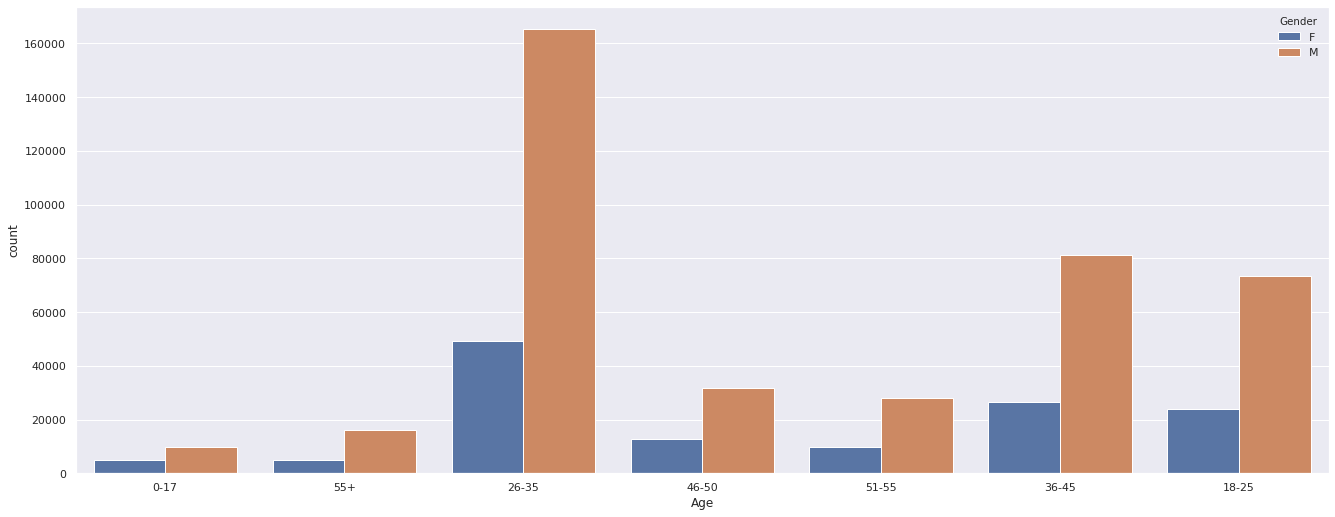

In [128]:
#Count based as per gender and age group
plt.figure(figsize = (20,8))
sns.countplot(df["Age"], hue=df["Gender"])

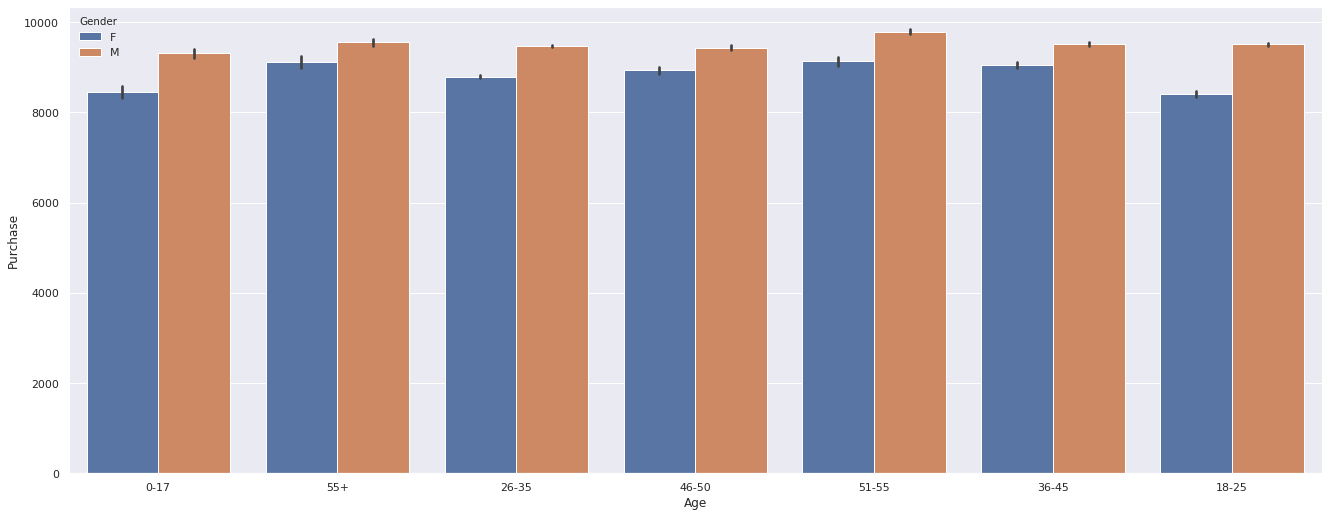

In [129]:
#Purchase shown by age and gender
plt.figure(figsize = (20,8))
sns.barplot(x="Age", y="Purchase", hue="Gender", data=df)

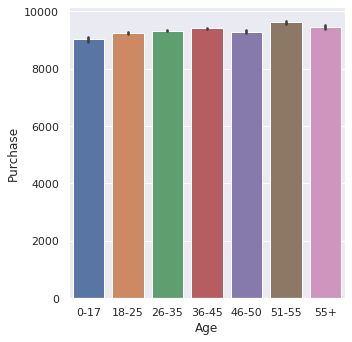

In [130]:
#Barplot of purchased items as per different age groups
plt.figure(figsize = (15, 5))

plt.subplot2grid((1, 3), (0, 0))
sns.barplot('Age', 'Purchase', data = df, order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

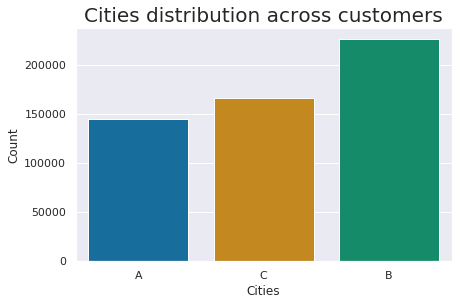

In [131]:
#Customer distribution across different cities
sns.countplot(df['City_Category'], palette = 'colorblind')
plt.title('Cities distribution across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

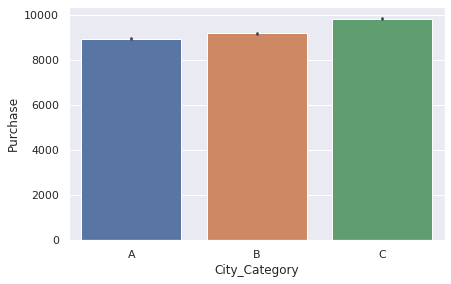

In [132]:
#Barplot as per purchase made in different cities
sns.barplot('City_Category', 'Purchase', data = df, order = ['A', 'B', 'C'])

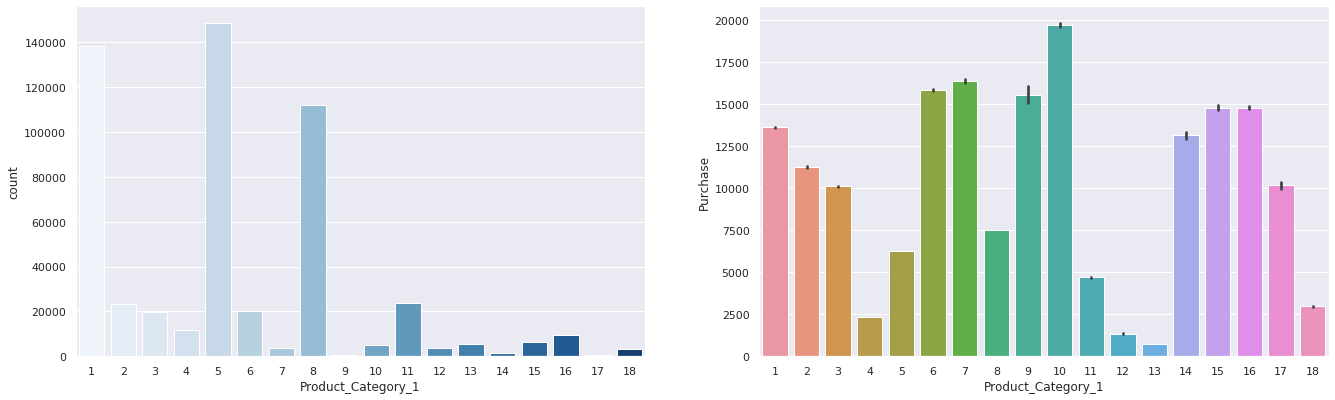

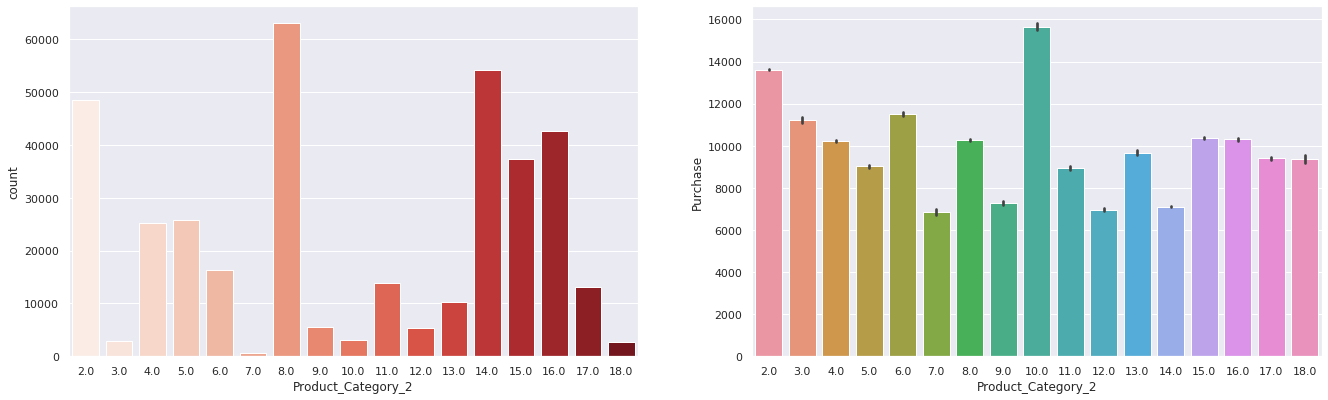

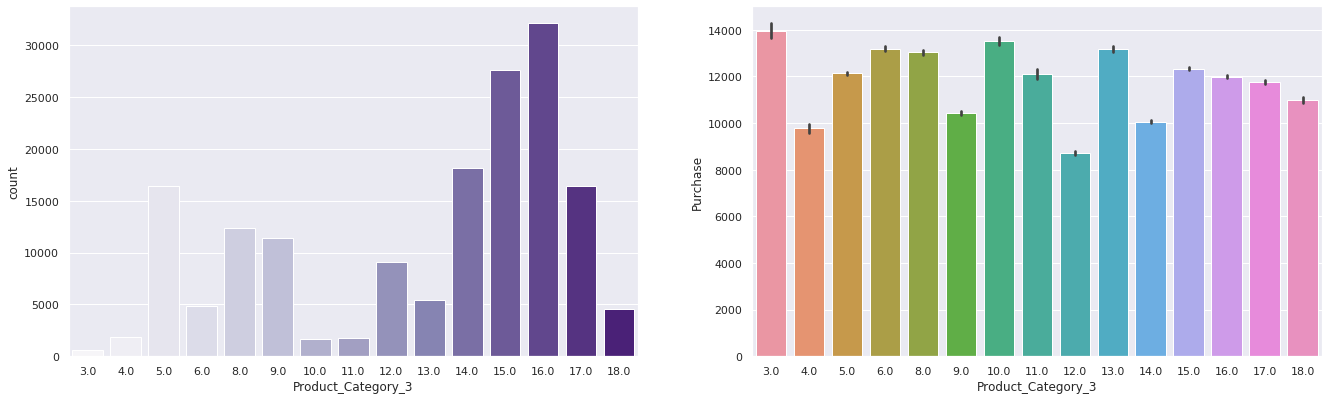

In [133]:
#Barplot defining different product categories with respect to count and purchase
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(df['Product_Category_1'], palette = 'Blues')

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(df['Product_Category_1'], df['Purchase'])

plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(df['Product_Category_2'], palette = 'Reds')

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(df['Product_Category_2'], df['Purchase'])

plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(df['Product_Category_3'], palette = 'Purples')

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(df['Product_Category_3'], df['Purchase'])

Data Pre-processing

In [134]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [135]:
# df_replace=df.fillna(0)

df_replace = df.dropna()
df_replace.shape
df_replace

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


In [0]:
# df_replace.isna().any()

In [137]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = df_replace['User_ID']
Product_ID = df_replace['Product_ID']

data = df_replace.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
537549,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,M,36-45,16,C,1,0,1,2.0,5.0,11852


In [0]:
#Converting categorical values into numerical values
data['Age'] = data['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})
data['Gender'] = data['Gender'].map({'M': 0,'F': 1})
data['City_Category'] = data['City_Category'].map({'A': 0,'B': 1,'C': 2})
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})


In [139]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,0,10,0,2,0,1,6.0,14.0,15200
6,0,4,7,1,2,1,1,8.0,17.0,19215
13,0,2,20,0,1,1,1,2.0,5.0,15665
14,1,5,9,0,1,0,5,8.0,14.0,5378
16,1,5,9,0,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...
537549,0,5,1,1,1,1,2,8.0,14.0,13082
537551,0,4,3,2,3,0,5,6.0,8.0,6863
537562,0,1,20,0,1,1,1,13.0,14.0,11508
537571,0,3,16,2,1,0,1,2.0,5.0,11852


In [140]:
#Feature selection and label selection
X = data.drop(['Purchase'], axis =1)

y = data['Purchase'].values
X


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
1,1,0,10,0,2,0,1,6.0,14.0
6,0,4,7,1,2,1,1,8.0,17.0
13,0,2,20,0,1,1,1,2.0,5.0
14,1,5,9,0,1,0,5,8.0,14.0
16,1,5,9,0,1,0,2,3.0,4.0
...,...,...,...,...,...,...,...,...,...
537549,0,5,1,1,1,1,2,8.0,14.0
537551,0,4,3,2,3,0,5,6.0,8.0
537562,0,1,20,0,1,1,1,13.0,14.0
537571,0,3,16,2,1,0,1,2.0,5.0


In [0]:
# splitting of training data set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [142]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

# finding the mean_squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("RMSE Error for Linear Regression:",rmse_linear)

# finding the r2 score or the variance
r2_linear = r2_score(y_test, y_pred_linear)
print("R2 Score for Linear Regression:", r2_linear)

RMSE Error for Linear Regression: 4619.0789346728025
R2 Score for Linear Regression: 0.17221594123738004


In [143]:
#Ridge Regression
model = Ridge()
model.fit(X_train, y_train)

y_pred_ridge = model.predict(X_test)

# finding the mean_squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE Error for Ridge Regression:", rmse_ridge)

# finding the r2 score or the variance
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Score for Ridge Regression:", r2_ridge)

RMSE Error for Ridge Regression: 4619.078876865083
R2 Score for Ridge Regression: 0.17221596195679567


In [144]:
# Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100)

random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)

# finding the mean_squared error
mse_random = mean_squared_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse_random)
print("RMSE Error for Random Forest Regression:", rmse_random)

# finding the r2 score or the variance
r2_random = r2_score(y_test, y_pred_random)
print("R2 Score for Random Forest Regression:", r2_random)


RMSE Error for Random Forest Regression: 3733.9174503714116
R2 Score for Random Forest Regression: 0.45907666687092996


In [145]:
# Decision tree regression model
tree = DecisionTreeRegressor(criterion='mse', max_depth=3)    # Initialize and fit regressor    

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
# finding the mean_squared error
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print("RMSE Error for Decision Tree Regressor:",rmse_tree )

# finding the r2 score or the variance
r2_tree = r2_score(y_test, y_pred_tree)
print("R2 Score for Decision Tree Regressor:", r2_tree)

RMSE Error for Decision Tree Regressor: 3960.9938522289744
R2 Score for Decision Tree Regressor: 0.391284125782677


In [146]:
# Lasso Regression 
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train, y_train)
y_pred_lasso = lassoReg.predict(X_test)

# finding the mean_squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE Error:",rmse_lasso)

# finding the r2 score or the variance
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 Score:", r2_lasso)

RMSE Error: 4627.02514245555
R2 Score: 0.16936541537524363


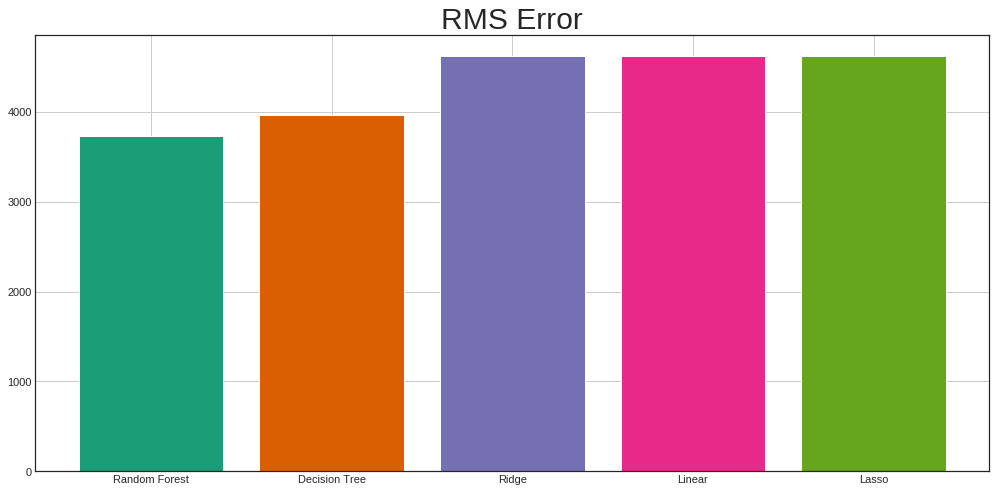

In [147]:
#Comparative analysis(RMS Error) of plots obtained for different regression methods 
rmse = np.array([rmse_linear,rmse_ridge,rmse_random,rmse_tree,rmse_lasso])
labels = np.array(['Linear','Ridge','Random Forest', 'Decision Tree', 'Lasso'])
indices = np.argsort(rmse)
color = plt.cm.Dark2(np.linspace(0, 1, 9))

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), rmse[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMS Error', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

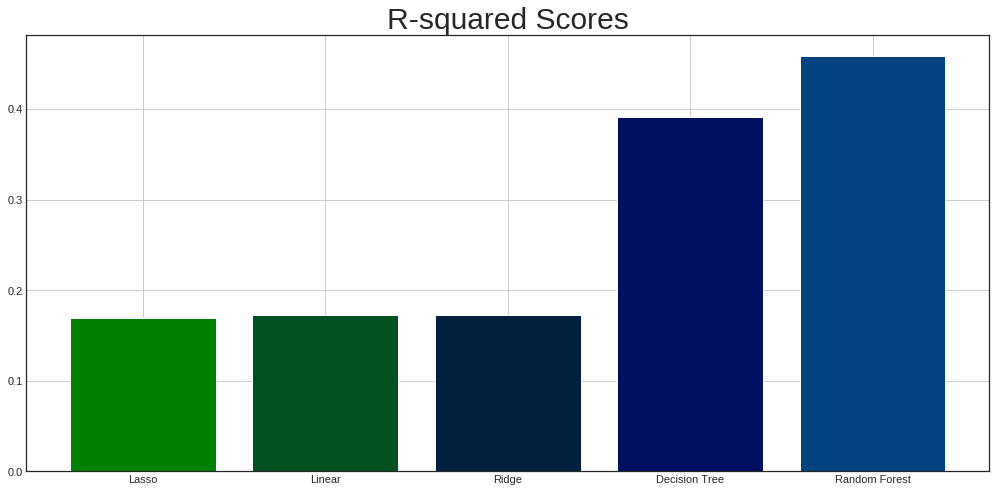

In [148]:
#Comparative analysis(R-squared scores) of plots obtained for different regression methods
r2_scores_regression = np.array([r2_linear,r2_ridge,r2_random,r2_tree,r2_lasso])
labels = np.array(['Linear','Ridge','Random Forest', 'Decision Tree', 'Lasso'])
indices = np.argsort(r2_scores_regression)
color = plt.cm.ocean(np.linspace(0, 1, 9))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), r2_scores_regression[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R-squared Scores', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()